In [2]:
#Problem statement - predict sales for big mart

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from xgboost import XGBRegressor  #model used for regression

In [4]:
data = pd.read_csv('big_mart_data.csv')

In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
data.shape

(8523, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
data.isnull().sum().sum()

3873

In [10]:
(3873/8523)*100

45.44174586413235

In [11]:
#since null > 30% proceed with imputation
data['Item_Weight'].mean()

12.857645184135976

In [12]:
# Item_Weight is numerical column this can be converted using mean
# Outlet_Size is object column this can be converted using mode
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [13]:
mode_outlet= data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [14]:
missing_values=data['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [15]:
#replacing missing values using mode
data.loc[missing_values,'Outlet_Size']=data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_outlet[x])

In [16]:
#check missing values
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [18]:
for i in data.columns:
    if data[i].dtype != object:
        print(i)

Item_Weight
Item_Visibility
Item_MRP
Outlet_Establishment_Year
Item_Outlet_Sales


In [19]:
sns.set() #setting theme for plot

C:\Users\SHRUTHI K\AppData\Local\Temp\ipykernel_768\3147443039.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


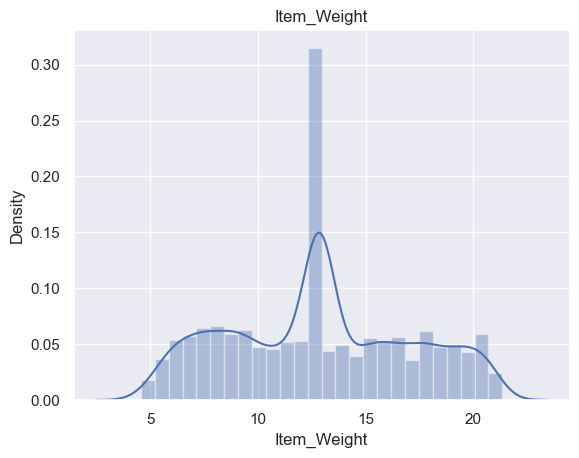

C:\Users\SHRUTHI K\AppData\Local\Temp\ipykernel_768\3147443039.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


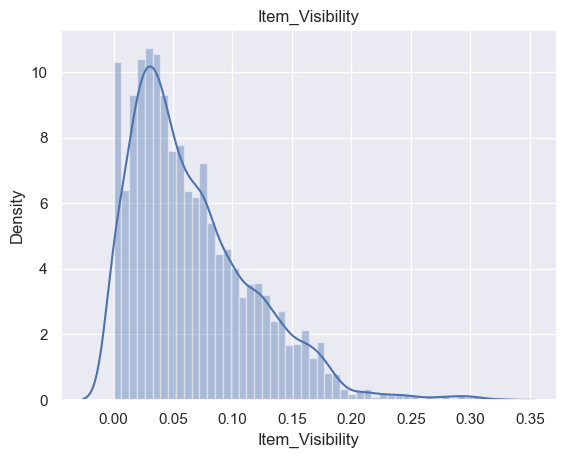

C:\Users\SHRUTHI K\AppData\Local\Temp\ipykernel_768\3147443039.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


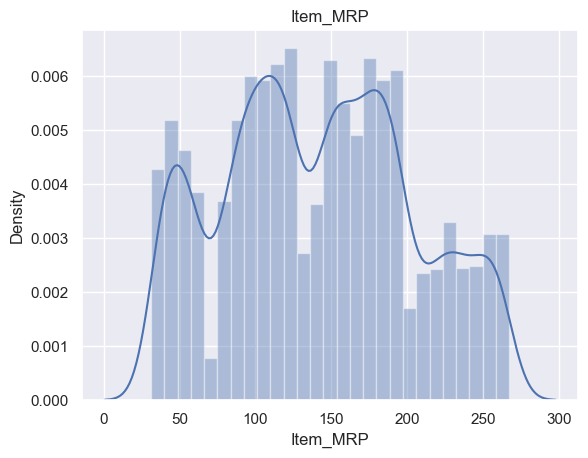

C:\Users\SHRUTHI K\AppData\Local\Temp\ipykernel_768\3147443039.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


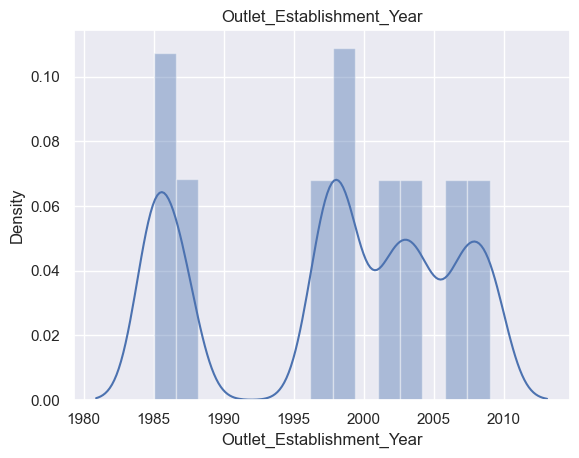

C:\Users\SHRUTHI K\AppData\Local\Temp\ipykernel_768\3147443039.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])


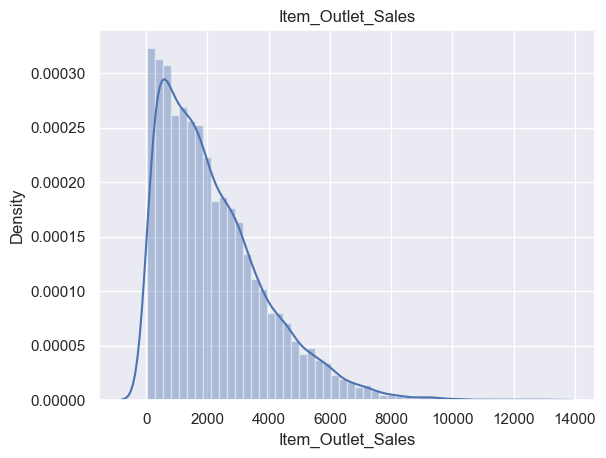

In [20]:
for i in data.columns:
    if data[i].dtype != object:
        sns.distplot(data[i])
        plt.xlabel(i)
        plt.ylabel('Density')
        plt.title(i)
        plt.show()

In [21]:
for i in data.columns:
    if data[i].dtype == object:
        print(i)

Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type


<Axes: xlabel='Item_Fat_Content', ylabel='count'>

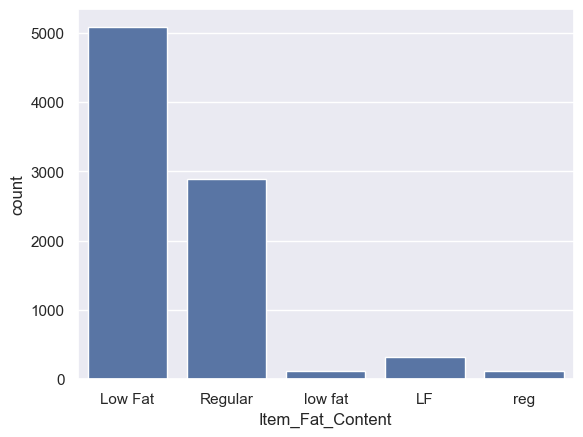

In [22]:
#for object data types
sns.countplot(x='Item_Fat_Content',data=data)

<Axes: xlabel='Item_Type', ylabel='count'>

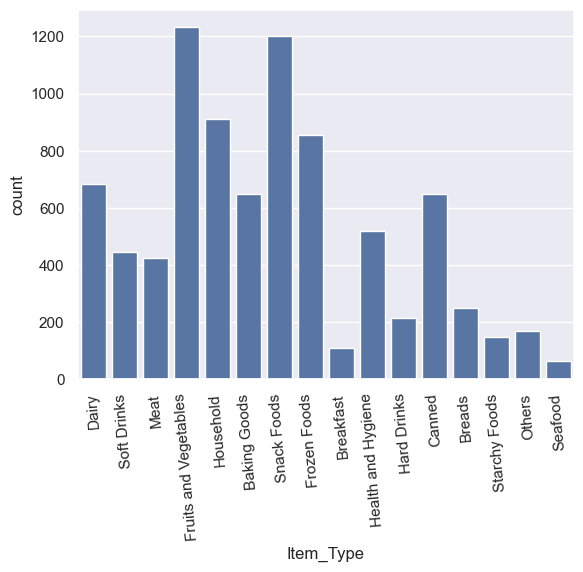

In [23]:
plt.xticks(rotation=95) 
sns.countplot(x='Item_Type',data=data)

<Axes: xlabel='Outlet_Size', ylabel='count'>

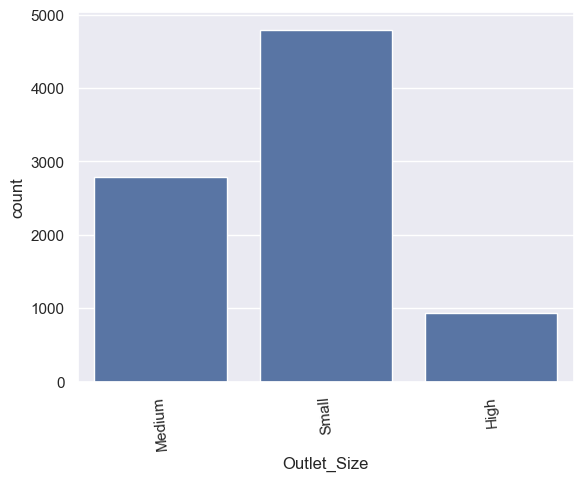

In [24]:
plt.xticks(rotation=95) 
sns.countplot(x='Outlet_Size',data=data)

In [25]:
data['Item_Fat_Content'].value_counts() # to note LF=low fat = Low Fat and Regular = reg,need to arrange

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [26]:
data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [27]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

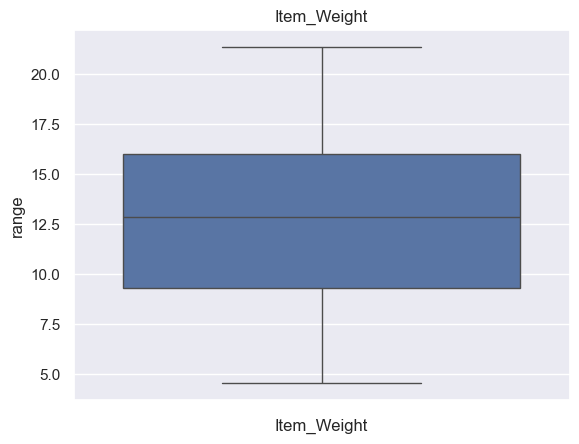

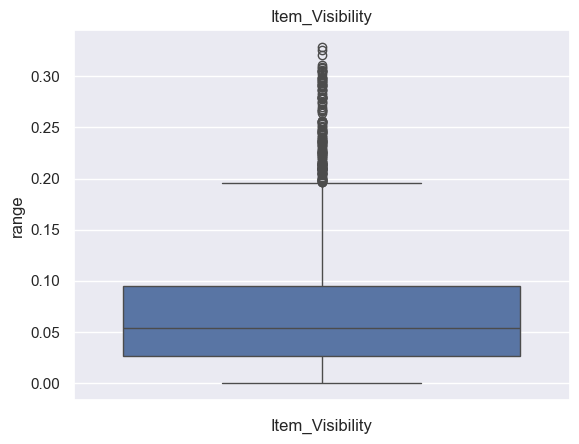

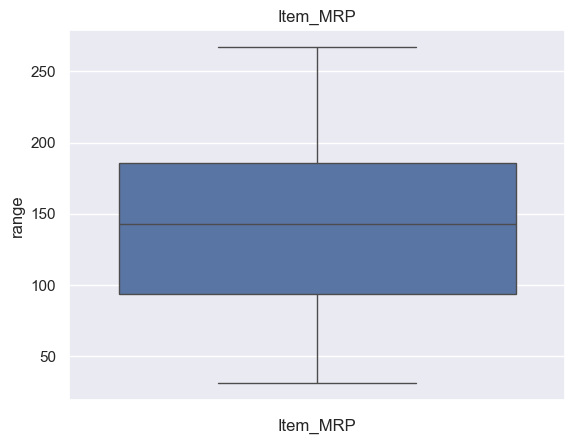

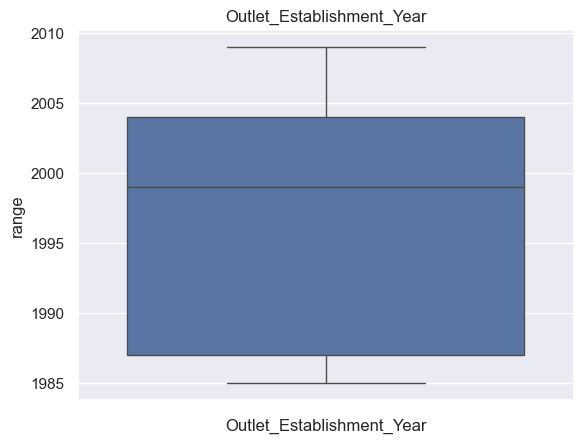

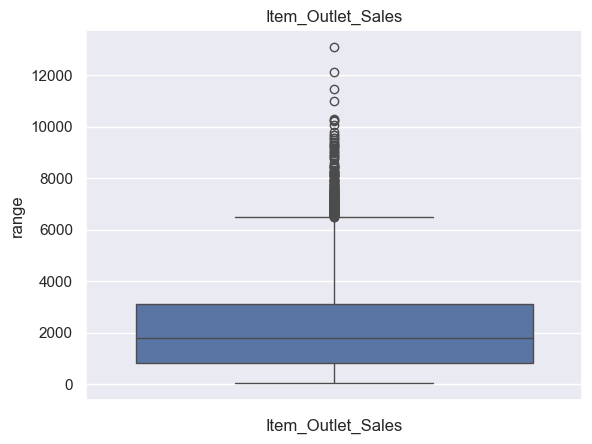

In [28]:
#check for outliers
for i in data.columns:
    if data[i].dtype != 'object':
        sns.boxplot(data[i])
        plt.xlabel(i)
        plt.ylabel('range')
        plt.title(i)
        plt.show()

In [29]:
# col = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']
# for i in col:
#     Q1=data[i].quantile(0.25)
#     Q3=data[i].quantile(0.75)
#     IQR=Q3-Q1
#     LF=Q1 - 1.5*IQR
#     UF=Q3 + 1.5*IQR
#     data= data[(data[i] >= LF) & (data[i]<= UF)]

In [30]:
# for i in data.columns:
#     if data[i].dtype != 'object':
#         sns.boxplot(data[i])
#         plt.xlabel(i)
#         plt.ylabel('range')
#         plt.title(i)
#         plt.show()

In [31]:
encoder = LabelEncoder()
#Item_Identifier
data['Item_Identifier']=encoder.fit_transform(data['Item_Identifier'])
#Item_Fat_Content
data['Item_Fat_Content']=encoder.fit_transform(data['Item_Fat_Content'])
#Item_Type
data['Item_Type']=encoder.fit_transform(data['Item_Type'])
#Outlet_Identifier
data['Outlet_Identifier']=encoder.fit_transform(data['Outlet_Identifier'])
# Outlet_Size
data['Outlet_Size']=encoder.fit_transform(data['Outlet_Size'])
# Outlet_Location_Type
data['Outlet_Location_Type']=encoder.fit_transform(data['Outlet_Location_Type'])
# Outlet_Type
data['Outlet_Type']=encoder.fit_transform(data['Outlet_Type'])

In [32]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [42]:
x1=data.iloc[:,:-1]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=2)

In [43]:
reg = XGBRegressor()

In [44]:
reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [45]:
Y_pred_train=reg.predict(x_train)

In [46]:
rscore=metrics.r2_score(y_train,Y_pred_train)
rscore

0.8762174618111388

In [47]:
y_pred = reg.predict(x_test)

In [48]:
r_2score=metrics.r2_score(y_test,y_pred)
r_2score

0.5017253991620692